In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [35]:
df2=df.dropna()

In [36]:
df2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [37]:
df2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [38]:
df2.nunique()

longitude               844
latitude                861
housing_median_age       52
total_rooms            5911
total_bedrooms         1923
population             3879
households             1809
median_income         12825
median_house_value     3833
ocean_proximity           5
dtype: int64

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

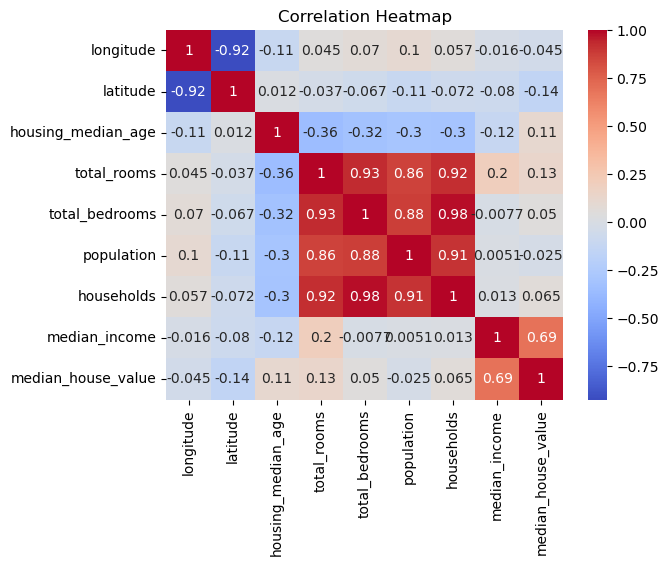

In [39]:
df1_numeric = df2.select_dtypes(include=['number'])  
corr_matrix = df1_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [40]:
df2["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [41]:
df_2= pd.get_dummies(df2, columns=['ocean_proximity'], drop_first=True).astype(int)
print(df_2.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122        37                  41          880             129   
1       -122        37                  21         7099            1106   
2       -122        37                  52         1467             190   
3       -122        37                  52         1274             235   
4       -122        37                  52         1627             280   

   population  households  median_income  median_house_value  \
0         322         126              8              452600   
1        2401        1138              8              358500   
2         496         177              7              352100   
3         558         219              5              341300   
4         565         259              3              342200   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1     

In [48]:
#splitting the data 
X=df_2.drop('median_house_value',axis=1)
y=df_2['median_house_value']

In [49]:
#splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (16346, 12)
Testing size: (4087, 12)


In [50]:
df_2.dtypes

longitude                     int32
latitude                      int32
housing_median_age            int32
total_rooms                   int32
total_bedrooms                int32
population                    int32
households                    int32
median_income                 int32
median_house_value            int32
ocean_proximity_INLAND        int32
ocean_proximity_ISLAND        int32
ocean_proximity_NEAR BAY      int32
ocean_proximity_NEAR OCEAN    int32
dtype: object

In [51]:
# normalization using robust scaler 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled_rs = scaler.fit_transform(X_train)
X_test_scaled_rs = scaler.transform(X_test)

In [53]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rfr=RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train_scaled_rs, y_train)
y_test_pred_rfr = rfr.predict(X_test_scaled_rs)
mse = mean_squared_error(y_test, y_test_pred_rfr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred_rfr)
print("\nTest RMSE:", rmse)
print("Test R2:", r2)


Test RMSE: 58928.08811770174
Test R2: 0.746071395798273


In [54]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)
xgb_reg.fit(X_train_scaled_rs, y_train)
y_test_pred_xgb = xgb_reg.predict(X_test_scaled_rs)
mse = mean_squared_error(y_test, y_test_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred_xgb)
print("\nTest RMSE:", rmse)
print("Test R2:", r2)


Test RMSE: 58291.93192806917
Test R2: 0.7515243291854858


In [55]:
df_2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122,37,41,880,129,322,126,8,452600,0,0,1,0
1,-122,37,21,7099,1106,2401,1138,8,358500,0,0,1,0
2,-122,37,52,1467,190,496,177,7,352100,0,0,1,0
3,-122,37,52,1274,235,558,219,5,341300,0,0,1,0
4,-122,37,52,1627,280,565,259,3,342200,0,0,1,0


In [57]:
y_test_pred_xgb1 = xgb_reg.predict([[-122,37,41,880,129,322,126,8,0,0,1,0]])
print(y_test_pred_xgb1)

[262635.6]


In [58]:
y_test_pred_rfr1 = rfr.predict([[-122,37,41,880,129,322,126,8,0,0,1,0]])
print(y_test_pred_rfr1)

[410989.58]
